# Coronavirus Analysis

On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people 

## The dataset is provided by Johns Hopkins University

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

Last updated 01/04/19

To get more recent data, go to:-https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv


In [1]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta,date,datetime
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [2]:
# Reading data, here data is stored in my local computer, to access it
# download it from the link provided above
og_data=pd.read_csv("C:/Users/user/Downloads/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [3]:
og_data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
#Check for null values
print(og_data.isnull().sum())

SNo                   0
ObservationDate       0
Province/State     4780
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [5]:
#Convert observation date to datetime format
og_data['ObservationDate']=pd.to_datetime(og_data['ObservationDate'])
og_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
# Grouping different cases of data according to dates
date_data=og_data.groupby(['ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date_data.head()


,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


E:\main\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


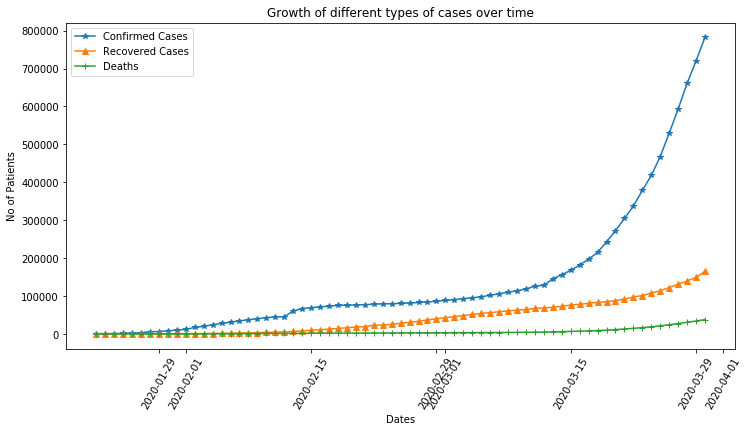

In [7]:
#Growth of different types of cases over time
plt.figure(figsize=(12,6))
plt.plot(date_data['Confirmed'],marker='*',label='Confirmed Cases')
plt.plot(date_data['Recovered'],marker='^',label='Recovered Cases')
plt.plot(date_data['Deaths'],marker='+',label='Deaths')
plt.xlabel('Dates')
plt.ylabel('No of Patients')
plt.xticks(rotation=60)
plt.title('Growth of different types of cases over time')
plt.legend()

### Model Predictions

In [8]:
#Creating new column with days since beginning of outbreak
date_data["Days Since"]=date_data.index-date_data.index[0]
date_data["Days Since"]=date_data["Days Since"].dt.days
date_data.head()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,0
2020-01-23,653.0,30.0,18.0,1
2020-01-24,941.0,36.0,26.0,2
2020-01-25,1438.0,39.0,42.0,3
2020-01-26,2118.0,52.0,56.0,4


In [9]:
#Splitting data into train and test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(np.array(date_data["Days Since"]).reshape(-1,1), np.array(date_data["Confirmed"]).reshape(-1,1), test_size = 0.45, random_state = 0, shuffle=False, stratify=None)

### Using Linear Regression

In [10]:
lin_reg=LinearRegression(normalize=True)

In [11]:
lin_reg.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
pred=lin_reg.predict(X_Test)

In [13]:
print("Root Mean Square Value:",np.sqrt(mean_squared_error(Y_Test,pred)))

Root Mean Square Value: 215174.96790770759


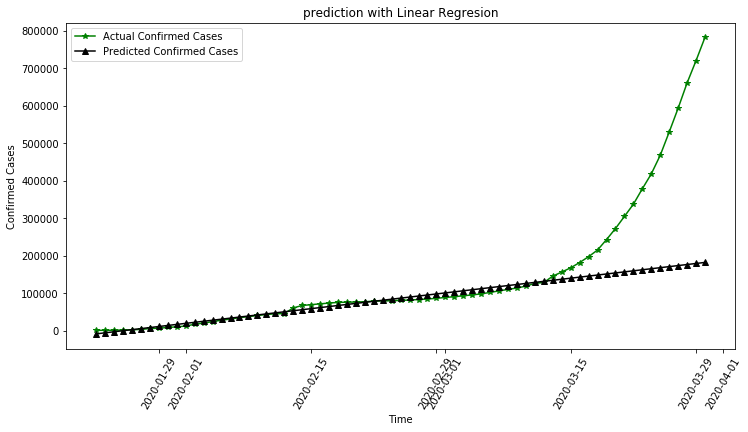

In [14]:
#Plotting a Graph for prediction
plt.figure(figsize=(12,6))
new_pred=lin_reg.predict(np.array(date_data['Days Since']).reshape(-1,1))
plt.plot(date_data["Confirmed"],marker='*',label="Actual Confirmed Cases",color='green')
plt.plot(date_data.index,new_pred, marker='^',label="Predicted Confirmed Cases",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("prediction with Linear Regresion")
plt.xticks(rotation=60)
plt.legend()

### Using SVM

In [15]:
svm=SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1,5,10],'gamma':[0.1,1]}

In [16]:
svm_cv=GridSearchCV(estimator=svm, param_grid=parameters, cv=4)

In [17]:
svm_cv.fit(X_Train,Y_Train)

E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\main\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 5, 10], 'gamma': [0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
svm_cv.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
pred_svm=svm_cv.best_estimator_.predict(X_Test)

In [20]:
print("Root Mean Square Value:",np.sqrt(mean_squared_error(Y_Test,pred_svm)))

Root Mean Square Value: 227381.89415601752


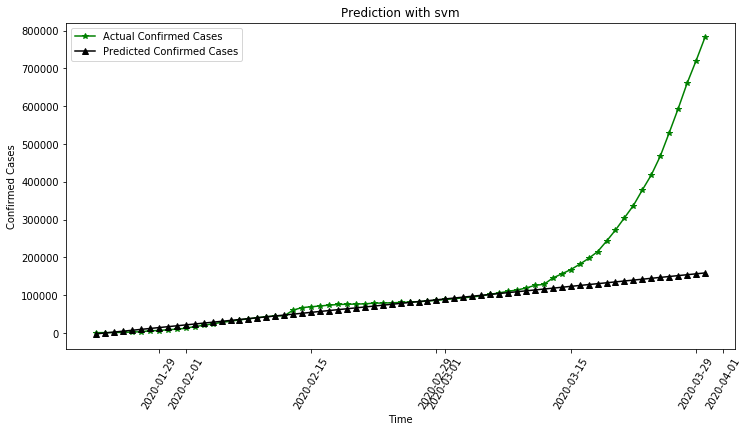

In [21]:
#Plotting a Graph for prediction with svm
plt.figure(figsize=(12,6))
new_pred_svm=svm_cv.best_estimator_.predict(np.array(date_data['Days Since']).reshape(-1,1))
plt.plot(date_data["Confirmed"],marker='*',label="Actual Confirmed Cases",color='green')
plt.plot(date_data.index,new_pred_svm, marker='^',label="Predicted Confirmed Cases",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Prediction with svm")
plt.xticks(rotation=60)
plt.legend()

### Let's try predictions for new dates

In [22]:
# Let's predict for next 20 days
new_dates=[]
new_dates_lr=[]
new_dates_svm=[]
new_dates_dt=[]
for i in range(1,21):
    new_dates.append(date_data.index[-1]+timedelta(days=i))
    new_dates_lr.append(lin_reg.predict(np.array(date_data['Days Since'][-1]+i).reshape(-1,1))[0][0])
    new_dates_svm.append(svm_cv.best_estimator_.predict(np.array(date_data['Days Since'][-1]+i).reshape(-1,1))[0])

    

In [23]:
model_predictions=pd.DataFrame(zip(new_dates,new_dates_lr,new_dates_svm),columns=["Dates","Linear Regression Pred","SVM Pred"])
model_predictions.head()

,Dates,Linear Regression Pred,SVM Pred
0,2020-03-31,184590.593883,161034.1625
1,2020-04-01,187393.717876,163406.2250
2,2020-04-02,190196.841868,165778.2875
3,2020-04-03,192999.965861,168150.3500
4,2020-04-04,195803.089853,170522.4125


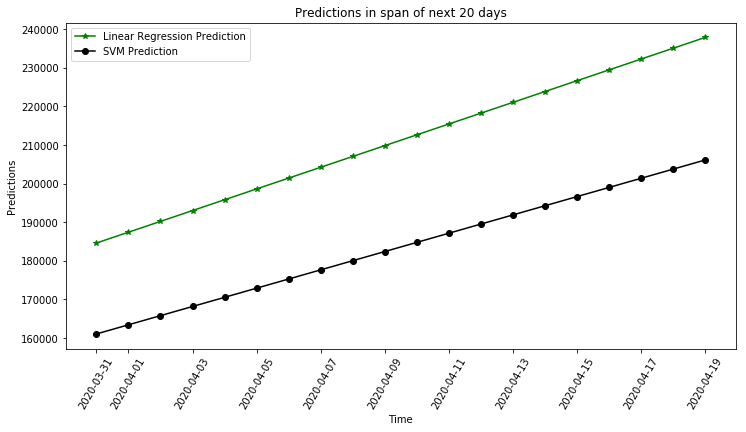

In [24]:
#Plotting a Graph for prediction with lr and svm
plt.figure(figsize=(12,6))
plt.plot(model_predictions['Dates'],model_predictions['Linear Regression Pred'],marker='*',label="Linear Regression Prediction",color='green')
plt.plot(model_predictions['Dates'],model_predictions['SVM Pred'],marker='o',label="SVM Prediction",color='black')
plt.xlabel('Time')
plt.ylabel('Predictions')
plt.xticks(rotation=60)
plt.title('Predictions in span of next 20 days')

plt.legend()

## State Wise Stats INDIA

Let's see state wise corona cases in India

The data is scraped from the official site of Ministry of Health and Family Welfare
https://www.mohfw.gov.in

In [25]:
import requests
from bs4 import BeautifulSoup

In [26]:
URL = 'https://www.mohfw.gov.in/'
content=lambda row: [x.text.replace('\n', '') for x in row] 
response=requests.get(URL).content
soup=BeautifulSoup(response,'html.parser')

stats = [] 
all_rows = soup.find_all('tr')

for row in all_rows:
    stat=content(row.find_all('td'))
    if stat:
        if len(stat)==5:
            stat=['',*stat]
            stats.append(stat)
        elif len(stat)==6:
            stats.append(stat)
stats.remove(stats[-1]) 

states=[]
for row in stats:
    states.append(row[2])
y=np.arange(len(states))

data=[]
for row in stats:
    data.append(int(int(row[3])+int(row[4])))

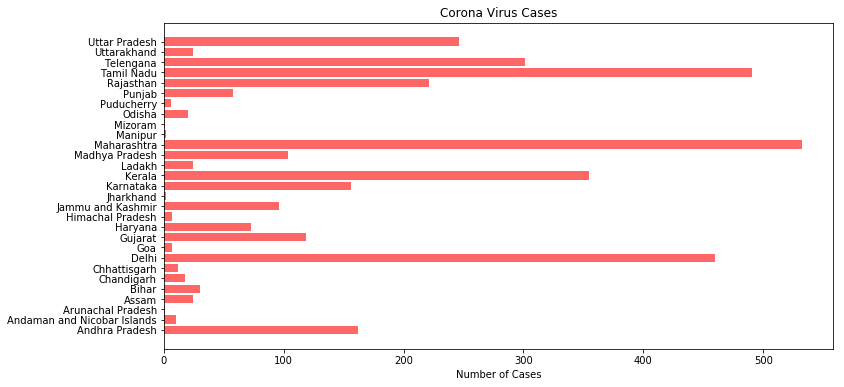

In [27]:
plt.figure(figsize=(12,6))

plt.barh(y,data,align='center',alpha=0.6,color='red')
plt.yticks(y,states)
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show()

## Stock Visualization

let's visualize the trends of stocks.

install on conda prompt:- pip install pandas_datareader.

We use api to fetch real time and historic stock data from yahoo finance.

In [28]:
import pandas_datareader.data as web

In [29]:
# Set the start date and end date according to your requirements
stock_data_sensex=web.DataReader("^BSESN","yahoo",datetime(2020,2,10),datetime.now())
stock_data_nifty=web.DataReader("^NSEI","yahoo",datetime(2020,2,10),datetime.now())
stock_data_dow=web.DataReader("^DJI","yahoo",datetime(2020,2,10),datetime.now())

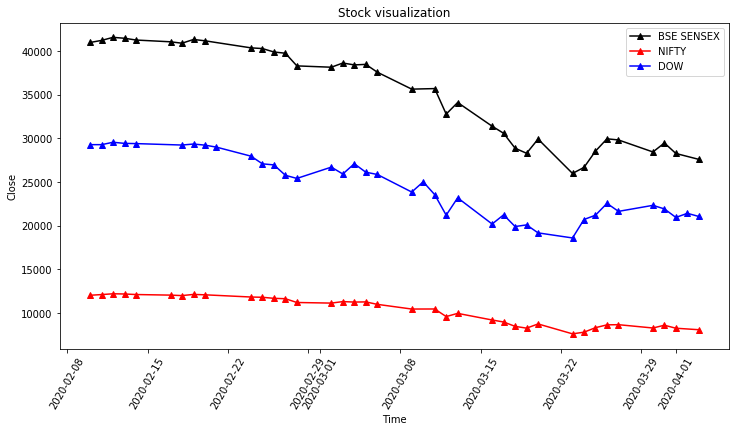

In [30]:
#Plotting a Graph for prediction
plt.figure(figsize=(12,6))
plt.plot(stock_data_sensex['Close'], marker='^',label="BSE SENSEX",color='black')
plt.plot(stock_data_nifty['Close'], marker='^',label="NIFTY",color='red')
plt.plot(stock_data_dow['Close'], marker='^',label="DOW",color='blue')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title("Stock visualization")
plt.xticks(rotation=60)
plt.legend()

## Pollution Statistics

Levels of air pollutants and warming gases over some cities and regions are showing significant drops as coronavirus impacts work and travel.

Researchers in New York told the BBC their early results showed carbon monoxide mainly from cars had been reduced by nearly 50% compared with last year.

Emissions of the planet-heating gas CO2 have also fallen sharply.

But there are warnings levels could rise rapidly after the pandemic.

We checked AQI level of countries for our analysis.

Data was provided by:- www.openaq.org

API was used to import real time data

To use the API:
 install the package directly via pypi through pip:- pip install py-openaq

In [31]:
import openaq
import warnings

warnings.simplefilter('ignore')
%matplotlib inline
sns.set("notebook", style='ticks', font_scale=1.0)

In [32]:
api=openaq.OpenAQ()

In [33]:
#Below are the functionalities of the api
data_city=api.cities(df=True,limit=10000)
#data_city.head()
data_india=data_city.query('country=="IN"')
#data_india.head()
data_country=api.countries(df=True, limit=10000)
#data_country.head()
data_parameters=api.parameters(df=True)
#data_parameters
data_sources=api.sources(df=True)
#data_sources.head()
data_locations=api.locations(df=True,country="IT")
#data_locations.head()
data_delhi=api.latest(df=True, city="Delhi", parameter='pm25')
#data_delhi.head()

In [34]:
# We used measurements parameter for our analysis
data_measurements=api.measurements(df=True,city="Chandigarh", parameter="pm25", has_geo=True, limit=1400, order_by=date)
#To get specified time series data, parameter tuning is to be done on limit and add parameter:(date_from) to fetch results from a specified date
data_measurements=data_measurements.reset_index()
data_measurements['date']=data_measurements['date.local'].dt.date
data_measurements=data_measurements.groupby(data_measurements['date']).agg({"value":'mean'})
data_measurements.head()


,value
date,
2020-03-12,22.113243
2020-03-13,18.427727
2020-03-14,9.204154
2020-03-15,10.294815
2020-03-16,18.296607


Text(0.5, 1.0, 'Pollution Stats of Chandigarh')

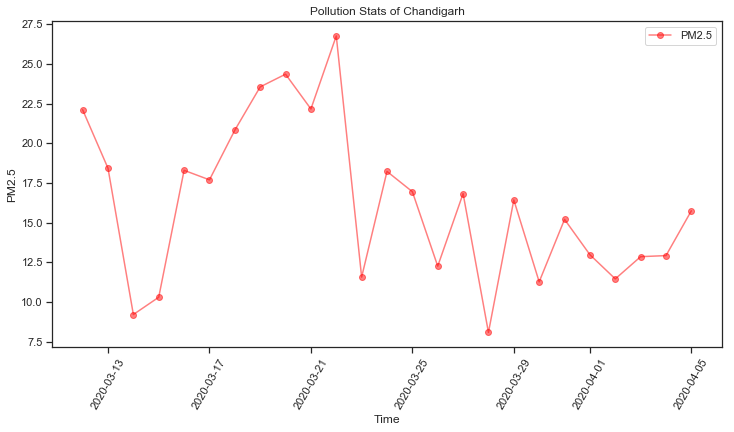

In [45]:
#Plotting a Graph for visualization
plt.figure(figsize=(12,6))
plt.plot(data_measurements["value"],marker='o',label="PM2.5",color='red',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=60)
plt.legend()
plt.title('Pollution Stats of Chandigarh')

In [36]:
# Let's check pollution stats of Italy(Most affected country)
data_measurement_IT=api.measurements(df=True,city="Roma", parameter="pm25", has_geo=True, limit=300, order_by=date)
data_measurement_IT=data_measurement_IT.groupby(data_measurement_IT.index).agg({"value":'mean'})
data_measurement_IT.head()

,value
date.local,
2020-03-05,7.750000
2020-03-06,6.636364
2020-03-07,8.363636
2020-03-08,7.454545
2020-03-09,10.636364


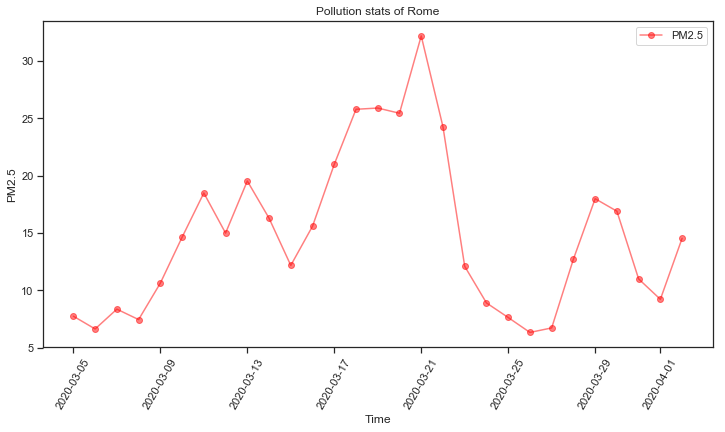

In [37]:
#Plotting a Graph for visualization
plt.figure(figsize=(12,6))
plt.plot(data_measurement_IT["value"],marker='o',label="PM2.5",color='red',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=60)
plt.title("Pollution stats of Rome")
plt.legend()

## Twitter Reaction and Sentiment Analysis

Twitterati had a lot to dig on this new burning topic.
Let's play with twitter data and get some important inferences.

The dataset is available at:- https://www.kaggle.com/akshat4112/coronavirustweets

Make sure to install wordcloud on your conda enviornment by typing pip install wordcloud on
your conda prompt.


In [38]:
#importing required libraries
from wordcloud import WordCloud, STOPWORDS
import re,string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df = pd.read_csv('C:/Users/user/Downloads/covid19-tweets.csv/covid19-tweets.csv', encoding = "ISO-8859-1")
#Since the dataset is quite large, let's work on 1/3rd of it.
df=df.loc[:8000]
df.head()


,Date,Tweets
0,3/7/2020 19:06,b'RT @tedlieu: Dear @hughhewitt: Yesterday @re...
1,3/7/2020 19:06,b'RT @NYGovCuomo: UPDATE: We have learned of n...
2,3/7/2020 19:05,"b""RT @Reuters: #Coronavirus update: Here's wha..."
3,3/7/2020 19:05,b'@trish_regan @realDonaldTrump So \xe2\x80\x9...
4,3/7/2020 19:05,b'RT @tedlieu: Dear @hughhewitt: Yesterday @re...


In [40]:
# Data Cleaning for wordcloud and frequency
def clean_text(tweets):
    tweets=word_tokenize(tweets)
    new_tweets=[]
    for i in tweets:
        if i.isalpha() and len(i)>3:# removing unnecessary words
            new_tweets.append(i.lower())
    tweets=" ".join(new_tweets).strip()
    tweets=re.sub('coronavirus','',tweets)#removing obvious words
    tweets=re.sub('corona','',tweets)
    tweets=re.sub('https','',tweets)
    tweets=re.sub('said','',tweets)
    tweets=re.sub('yesterday','',tweets)
    tweets=re.sub('dear','',tweets)
    tweets=[word for word in tweets.split() if word not in stopwords.words("english")]#removing common english words like(I,YOU,WE..)
    return " ".join(tweets).strip()
df["Cleaned Text"]=df["Tweets"].apply(clean_text)
df["Cleaned Text"].head(5)

0    tedlieu hughhewitt realdonaldtrump kudlow kell...
1    nygovcuomo update learned confirmed cases brin...
2                       reuters update need know right
3                  realdonaldtrump journalistic report
4    tedlieu hughhewitt realdonaldtrump kudlow kell...
Name: Cleaned Text, dtype: object

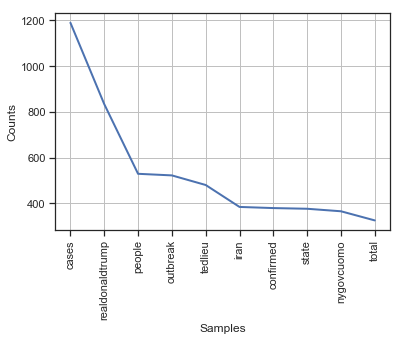

In [41]:
#Creating graph of most used words
from nltk.probability import FreqDist
clean_term = []
for terms in df['Cleaned Text']:
    clean_term += terms.split(" ")
cleaned = FreqDist(clean_term)
cleaned.plot(10)

Text(0.5, 1.0, 'Coronavirus')

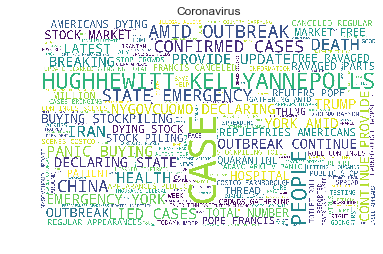

In [42]:
#Creating wordcloud
stopwords=set(STOPWORDS)
stopwords.add("REALDONALDTRUMP")#removing common,unnecessary,obvious words
stopwords.add("TEDLIEU")
stopwords.add("KUDLOW")
wordcloud = WordCloud(width=5500, height=3400, background_color="white",stopwords=stopwords,random_state = 3016).generate(" ".join([i for i in df['Cleaned Text'].loc[:500].str.upper()]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Coronavirus")

In [43]:
#Performing sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
nltk.download('vader_lexicon')

sid=SentimentIntensityAnalyzer()
df['sentiment_compound_polarity']=df["Cleaned Text"].apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df["Cleaned Text"].apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df["Cleaned Text"].apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_positive']=df["Cleaned Text"].apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''

df.loc[df.sentiment_compound_polarity>0,'sentiment_type']="POSITIVE"
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']="NEGATIVE"
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']="NEUTRAL"
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Tweets,Cleaned Text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
0,3/7/2020 19:06,b'RT @tedlieu: Dear @hughhewitt: Yesterday @re...,tedlieu hughhewitt realdonaldtrump kudlow kell...,0.0000,1.00,0.0,0.00,NEUTRAL
1,3/7/2020 19:06,b'RT @NYGovCuomo: UPDATE: We have learned of n...,nygovcuomo update learned confirmed cases brin...,0.0772,0.86,0.0,0.14,POSITIVE
2,3/7/2020 19:05,"b""RT @Reuters: #Coronavirus update: Here's wha...",reuters update need know right,0.0000,1.00,0.0,0.00,NEUTRAL
3,3/7/2020 19:05,b'@trish_regan @realDonaldTrump So \xe2\x80\x9...,realdonaldtrump journalistic report,0.0000,1.00,0.0,0.00,NEUTRAL
4,3/7/2020 19:05,b'RT @tedlieu: Dear @hughhewitt: Yesterday @re...,tedlieu hughhewitt realdonaldtrump kudlow kell...,0.0000,1.00,0.0,0.00,NEUTRAL


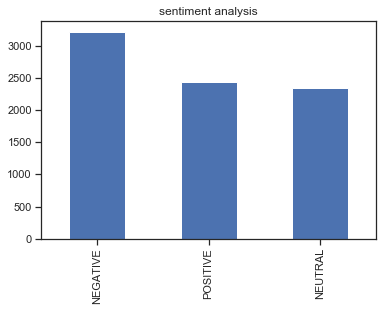

In [44]:
df.sentiment_type.value_counts().plot(kind='bar', title="sentiment analysis")